#Global Pollution Analysis and Energy Recovery



In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from geopy.distance import geodesic
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

##Phase 1: Data Collection and Exploratory Data Analysis (EDA)


###Step 1 - Data Import and Preprocessing

In [ ]:
#Load the Dataset
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [ ]:
#Handle Missing Data
print(df.isnull().sum())

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [ ]:


#Normalize/Scaling
scaler = MinMaxScaler()
pollution_cols = ["Air_Pollution_Index" , "Water_Pollution_Index" , "Soil_Pollution_Index"]
df[pollution_cols] = scaler.fit_transform(df[pollution_cols])
df.head()



,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


###Step 2 - Exploratory Data Analysis (EDA)

              Year  Air_Pollution_Index  Water_Pollution_Index  \
count   200.000000           200.000000             200.000000   
mean   2009.335000             0.526255               0.499067   
std       5.765325             0.270839               0.282900   
min    2000.000000             0.000000               0.000000   
25%    2004.000000             0.341904               0.258160   
50%    2010.000000             0.537391               0.482639   
75%    2014.000000             0.755603               0.751219   
max    2019.000000             1.000000               1.000000   

       Soil_Pollution_Index  Industrial_Waste (in tons)  \
count            200.000000                   200.00000   
mean               0.473193                 52891.68150   
std                0.287462                 27224.49169   
min                0.000000                  1019.37000   
25%                0.215419                 31201.97250   
50%                0.488485                 55299.1

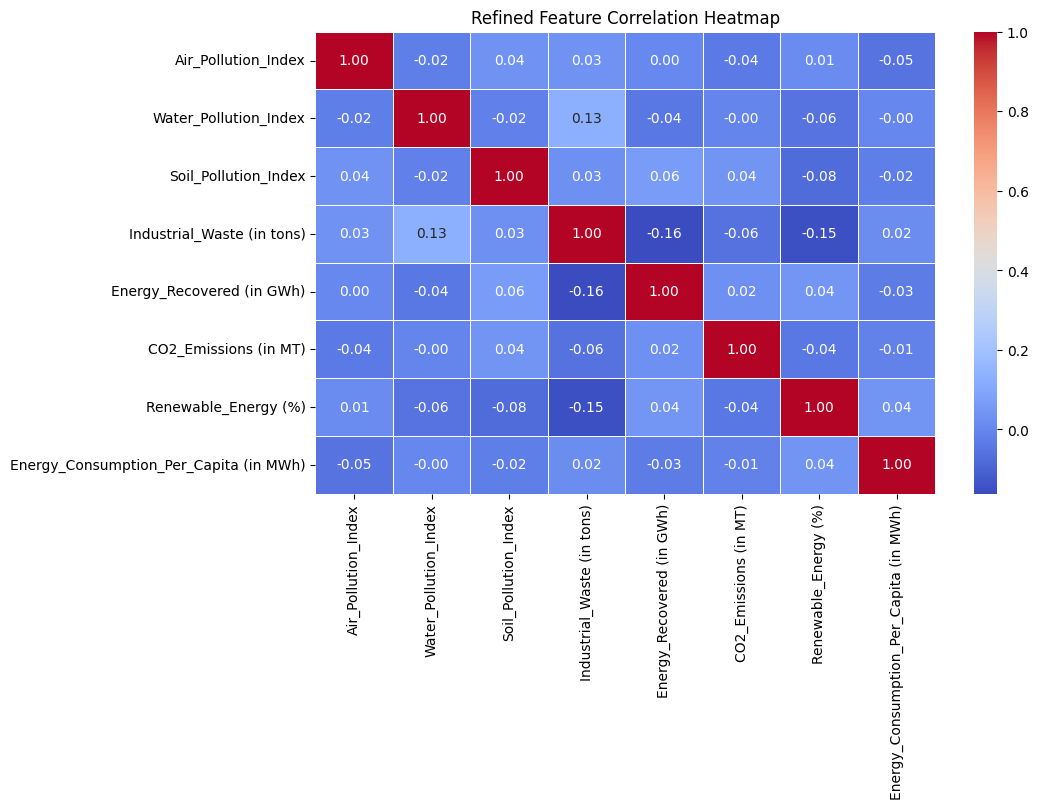

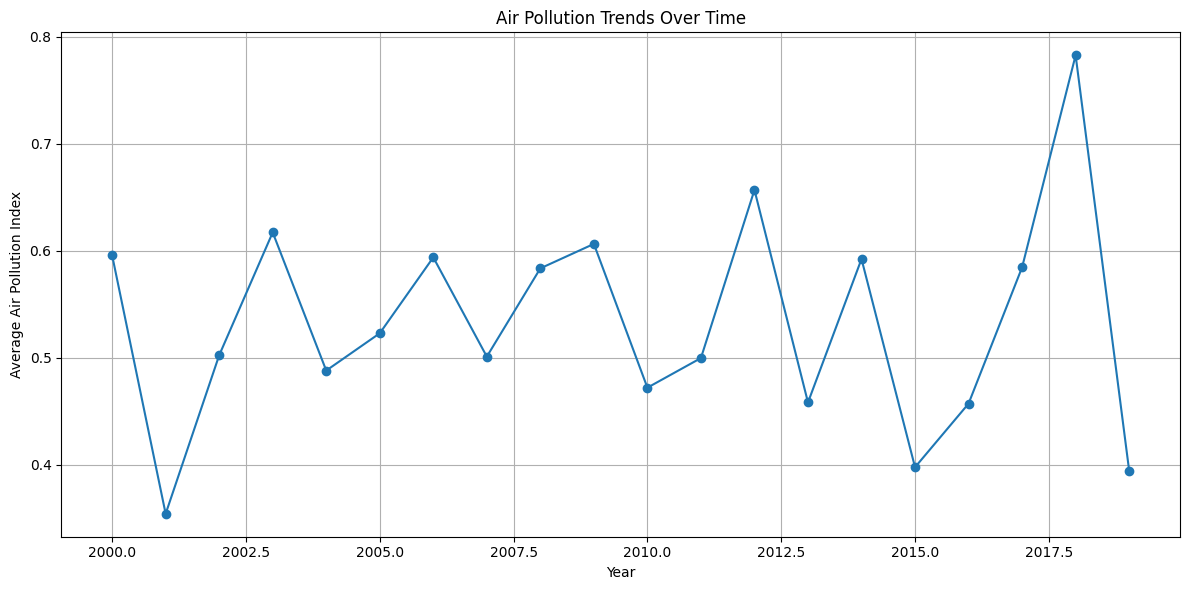

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
print(df.describe())

# Correlation Analysis
correlation_features = [
    "Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index",
    "Industrial_Waste (in tons)", "Energy_Recovered (in GWh)",
    "CO2_Emissions (in MT)", "Renewable_Energy (%)",
    "Energy_Consumption_Per_Capita (in MWh)"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[correlation_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Refined Feature Correlation Heatmap")
plt.show()

# (Visualization)Air Pollution Trend Over Time (using 'Year' column directly)()
plt.figure(figsize=(12, 6))
df.groupby("Year")["Air_Pollution_Index"].mean().plot(kind="line", marker="o")
plt.xlabel("Year")
plt.ylabel("Average Air Pollution Index")
plt.title("Air Pollution Trends Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


###Step 3 - Feature Engineering

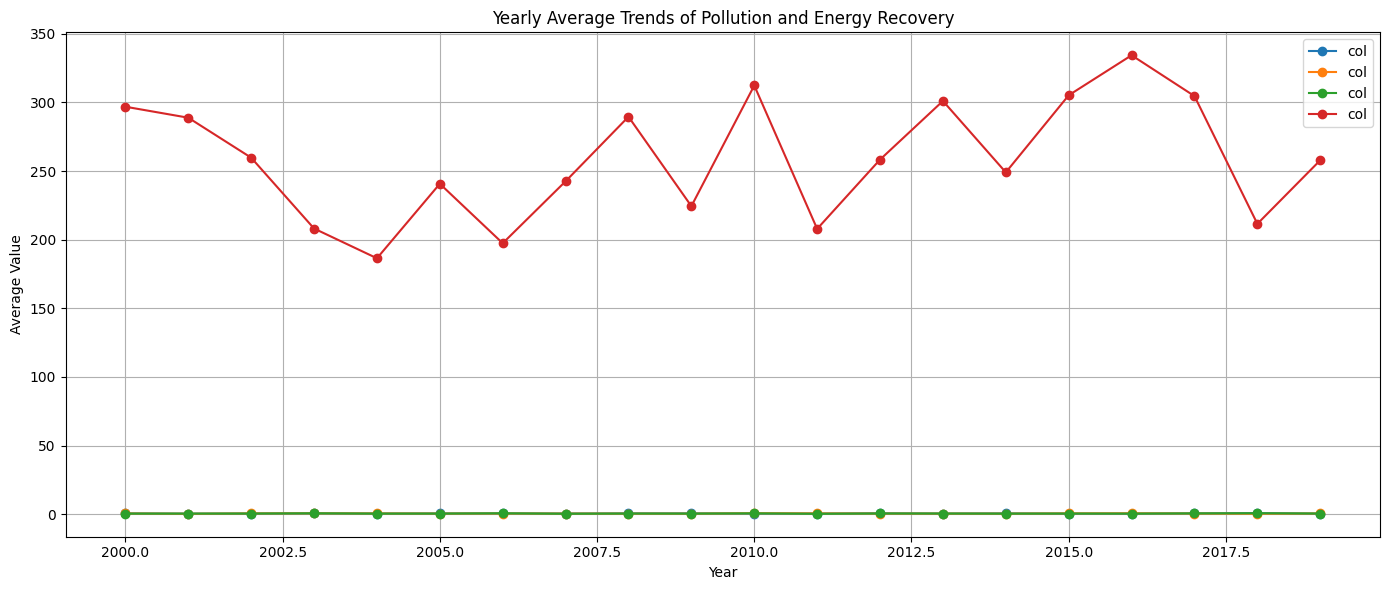

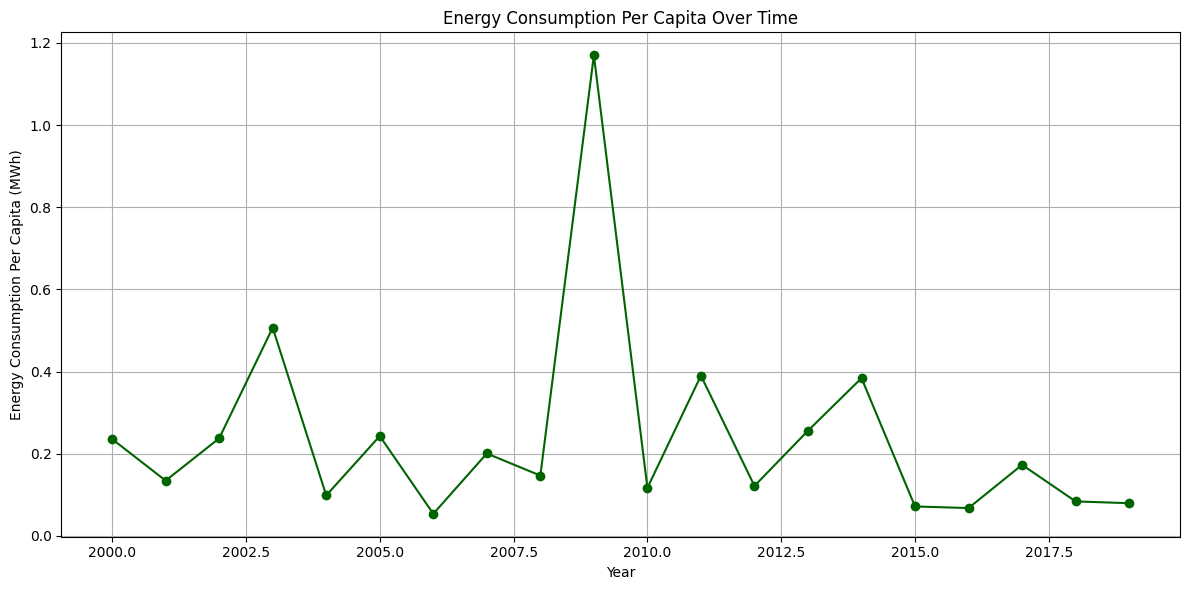

In [ ]:
#Yearly Trends
yearly_trends = df.groupby('Year')[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Energy_Recovered (in GWh)']].mean()

#Plotting trends
plt.figure(figsize = (14 , 6))
for col in yearly_trends.columns:
  plt.plot(yearly_trends.index , yearly_trends[col] , marker = 'o' , label = 'col')

plt.title('Yearly Average Trends of Pollution and Energy Recovery')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show


#Energy Consumption per Capita
# Example (if needed):
df["Energy_Consumption_Per_Capita (in MWh)"] = df["Energy_Consumption_Per_Capita (in MWh)"] / df["Population (in millions)"]

plt.figure(figsize=(12, 6))
df.groupby("Year")["Energy_Consumption_Per_Capita (in MWh)"].mean().plot(kind="line", marker="o", color='darkgreen')
plt.title("Energy Consumption Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("Energy Consumption Per Capita (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()



##Phase 2: Predictive Modeling

###Step 4 - Linear Regression Model (for Pollution Prediction)

In [ ]:
#Model Objective
selected_features = ['Air_Pollution_Index','CO2_Emissions (in MT)','Industrial_Waste (in tons)']
target = 'Energy_Recovered (in GWh)'
data_model = df[selected_features + [target]].dropna()

X = data_model[selected_features]
y = data_model[target]

#Split the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Implementation
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

#Evaluation Metrics
y_pred = lr_model.predict(X_test)
mse =  mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Linear Regression Model Evaluation')
print(f"R-Square:{r2:.4f}")
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Linear Regression Model Evaluation
R-Square:-0.0252
Mean Squared Error: 24792.81
Mean Absolute Error: 142.11


###Step 5 - Logistic Regression Model (for Categorization of Pollution Levels)

Pollution_Severity
Medium    78
Low       62
High      60
Name: count, dtype: int64
Accuracy: 0.975
Precision: 0.9764705882352942
Recall: 0.975
F1 Score: 0.9748353096179183


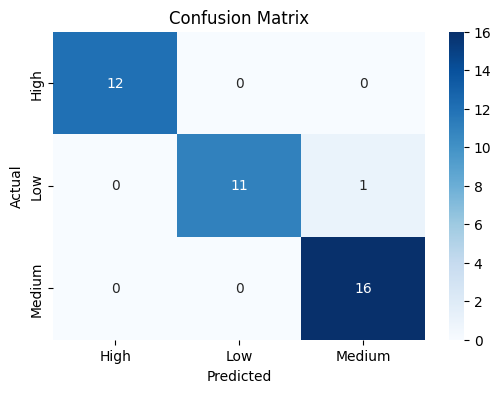

In [ ]:
#First define pollution severity
def classify_pollution(index):
  if index < 0.4:
    return 'Low'
  elif index <= 0.7:
    return 'Medium'
  else:
    return 'High'

df['Pollution_Severity'] = df['Air_Pollution_Index'].apply(classify_pollution)
print(df['Pollution_Severity'].value_counts())

#Encoding
label_encoder = LabelEncoder()
df['Pollution_Severity_Label'] = label_encoder.fit_transform(df['Pollution_Severity'])

feature_log = ['Air_Pollution_Index' , 'CO2_Emissions (in MT)']
target_log = 'Pollution_Severity_Label'

log_data = df[feature_log + [target_log]].dropna()

X_log = log_data[feature_log]
y_log = log_data[target_log]

#Split the dataset into training and testing set
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42 , stratify = y_log)

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train_log, y_train_log)

#Evaluation Metrics
y_pred_log = log_model.predict(X_test_log)

# Basic Scores
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log, average='weighted')
recall = recall_score(y_test_log, y_pred_log, average='weighted')
f1 = f1_score(y_test_log, y_pred_log, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####Insight 1: Pollution vs Energy Recovery
From the linear regression, if Air_Pollution_Index and CO2_Emissions were strong negative predictors of energy recovery, it means:

Higher pollution = lower energy recovery efficiency

Countries with cleaner air may be recovering more energy per ton of waste or emission

✅ Recommendation: Invest in clean technologies to both reduce pollution and optimize energy recovery systems.

💡 Insight 2: Categorization of Countries
From your logistic regression model, countries can now be categorized into pollution severity groups.

This helps in policy planning, allocating resources, and setting emission goals.

✅ Recommendation: Countries in the “High” category should:

Be targeted for pollution-reduction initiatives

Be encouraged to shift toward renewable energy and waste management technologies.